In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_, score
from sklearn.preprocessing import PolynomialFeatures

In [23]:
from sklearn import datasets
iris = datasets.load_iris()

Y = (iris["target"] == 0).astype(np.int) 
X = iris["data"] 

Xstd = (X-X.min())/(X.max()-X.min())

df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [24]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Effect of L1 regularization on coefficient magnitude

#### No Regularization

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xstd,Y,test_size=0.2, random_state=42)
sk_lr = LogisticRegression( fit_intercept = True, C=1)
sk_lr.fit(X_train,y_train)
sk_Pred = sk_lr.predict(X_test)


print("No L1 regularization \n\n")

print("Test confusion matrix")
print(metrics.confusion_matrix(sk_Pred,y_test), "\n")
print("Intercept Coefficient", sk_lr.intercept_)
print("Coefficient for sepal length:", np.round(sk_lr.coef_ [0][0],1))
print("Coefficient for sepal width:", np.round(sk_lr.coef_ [0][1],1))
print("Coefficient for petal length:", np.round(sk_lr.coef_ [0][2],1))
print("Coefficient for petal width:", np.round(sk_lr.coef_ [0][3],1))

No L1 regularization 


Test confusion matrix
[[20  0]
 [ 0 10]] 

Intercept Coefficient [2.12302787]
Coefficient for sepal length: -1.5
Coefficient for sepal width: 1.1
Coefficient for petal length: -4.7
Coefficient for petal width: -1.9


In [33]:
Y = (iris["target"] == 0).astype(np.int) 
X = iris["data"] # petal width
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

sk_lr = LogisticRegression(penalty = 'l1', solver='liblinear', fit_intercept = True, C=15)
sk_lr.fit(X_train,y_train)
sk_Pred = sk_lr.predict(X_test)

print("With L1 regularization C = 15 \n\n")

print("Test confusion matrix")
print(metrics.confusion_matrix(sk_Pred,y_test), "\n")
print("Intercept Coefficient", sk_lr.intercept_)
print("Coefficient for sepal length:", sk_lr.coef_ [0][0])
print("Coefficient for sepal width:", np.round(sk_lr.coef_ [0][1],1))
print("Coefficient for petal length:", np.round(sk_lr.coef_ [0][2],1))
print("Coefficient for petal width:", sk_lr.coef_ [0][3])

With L1 regularization C = 15 


Test confusion matrix
[[20  0]
 [ 0 10]] 

Intercept Coefficient [0.]
Coefficient for sepal length: 0.13968729087978354
Coefficient for sepal width: 4.0
Coefficient for petal length: -4.8
Coefficient for petal width: 0.0


l1 regularization gives a clearer picture by reducing the irrelevant weights to zero.

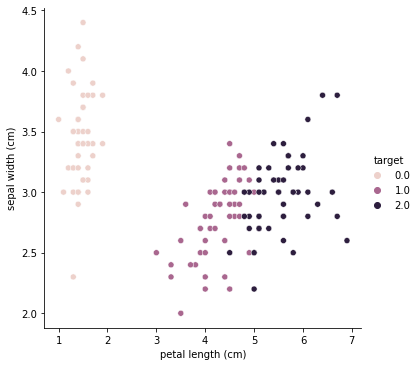

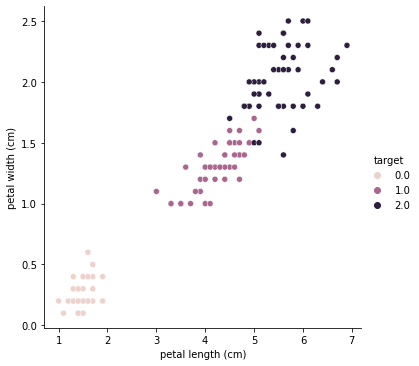

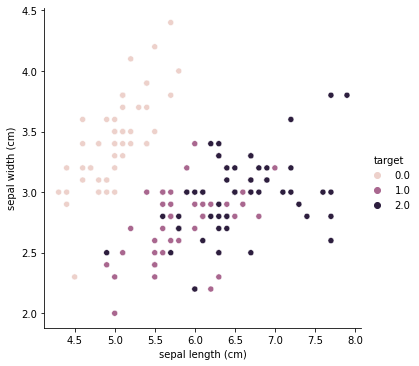

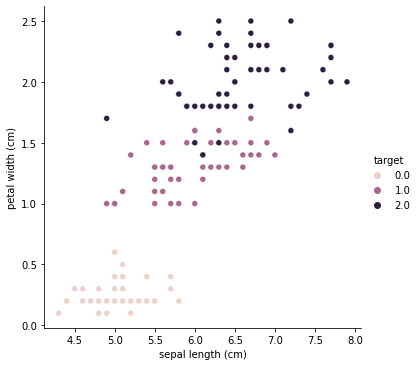

In [27]:
import seaborn as sns 

sns.relplot(x='petal length (cm)', y='sepal width (cm)', hue="target", data=df_iris);
sns.relplot(x='petal length (cm)', y='petal width (cm)', hue="target", data=df_iris);
sns.relplot(x='sepal length (cm)', y='sepal width (cm)', hue="target", data=df_iris);
sns.relplot(x='sepal length (cm)', y='petal width (cm)', hue="target", data=df_iris);

## Observation 

L1 regularization knocks down unimportant features. Plotting the features, we observe the classes look linearly seperable using these two features. 

#### C = 0.01 (Very high regularization)

Lets check with higher regularization

In [21]:
sk_lr = LogisticRegression(penalty = 'l1', solver='liblinear', fit_intercept = True, C=0.01)
sk_lr.fit(X_train,y_train)
sk_Pred = sk_lr.predict(X_test)
print("Very heavy L1 regularization C = 0.01 \n\n")

print("Test confusion matrix")
print(metrics.confusion_matrix(sk_Pred,y_test), "\n")
print("Intercept Coefficient", sk_lr.intercept_)
print("Coefficient for sepal length:", sk_lr.coef_ [0][0])
print("Coefficient for sepal width:", np.round(sk_lr.coef_ [0][1],1))
print("Coefficient for petal length:", np.round(sk_lr.coef_ [0][2],1))
print("Coefficient for petal width:", sk_lr.coef_ [0][3])

Very heavy L1 regularization C = 0.01 


Test confusion matrix
[[20 10]
 [ 0  0]] 

Intercept Coefficient [0.]
Coefficient for sepal length: 0.0
Coefficient for sepal width: 0.0
Coefficient for petal length: -0.1
Coefficient for petal width: 0.0


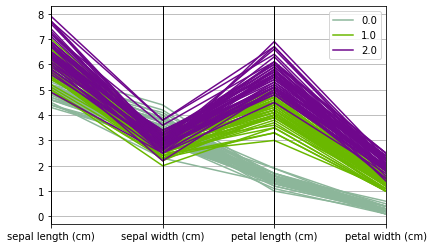

In [18]:
import pandas as pd
from pandas.plotting import parallel_coordinates


parallel_coordinates(df_iris, "target");

## Observation

From the parallel plot, we see the third feature (petal length) looks the most important. Interestingly, with a high value of l1 regularization, log regression is also tending to choose the same. :) But  our test predictions are failing terribly :|

For completeness lets use very very heavy regularization. All coefficients go to zero.

In [19]:
sk_lr = LogisticRegression(penalty = 'l1', solver='liblinear', fit_intercept = True, C=0.01)
sk_lr.fit(X_train,y_train)
sk_Pred = sk_lr.predict(X_test)
print("Too heavy L1 regularization C = 0.01 \n\n")

print("Test confusion matrix")
print(metrics.confusion_matrix(sk_Pred,y_test), "\n")
print("Intercept Coefficient", sk_lr.intercept_)
print("Coefficient for sepal length:", sk_lr.coef_ [0][0])
print("Coefficient for sepal width:", np.round(sk_lr.coef_ [0][1],1))
print("Coefficient for petal length:", np.round(sk_lr.coef_ [0][2],1))
print("Coefficient for petal width:", sk_lr.coef_ [0][3])

Too heavy L1 regularization C = 0.01 


Test confusion matrix
[[20 10]
 [ 0  0]] 

Intercept Coefficient [0.]
Coefficient for sepal length: 0.0
Coefficient for sepal width: 0.0
Coefficient for petal length: -0.1
Coefficient for petal width: 0.0


## Conclusion

<img src="./../helper/LC1.PNG" alt="Drawing" style="width: 800px;"/> 


* Case 1 - No Reg: All non zero coefficients 
* Case 2 - With L1 reg:  knocks down unimportant features. Plotting the features, we observe the classes look linearly seperable using these two features.This seems the right fit. 
* Case 3 - With heavy L1 reg: L1 reg retains only one (most important feature) as seen from the parallel plot. Although our test predictions are bad. So model has bias.
* Case 4: With very heavy L1: All coeeficients are zero. 

In [28]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
